# <center>  <font color=blackyellow> ** COVID-19 **
![](https://www.digital-discovery.tn/wp-content/uploads/2020/03/covid19.jpg)

# Introduction :

This Notebook ,  intends to analyse datas over course the period between 22-01-2020 to 21-03-2020 ,in order to extract insights that can allow to modelate a pattern , that helps to predict  confirmed cases and fatalities between March 25 nd april 22 by region .

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/covid19-global-forecasting-week-1/train.csv
/kaggle/input/covid19-global-forecasting-week-1/submission.csv
/kaggle/input/covid19-global-forecasting-week-1/test.csv
/kaggle/input/mapbox/private_mapbox_access_token.cpython-36.pyc


# Importing datas:

In [2]:
import os 
path='/kaggle/input/covid19-global-forecasting-week-1/'

In [3]:
datas=pd.read_csv(os.path.join(path,'train.csv'))
datas.head() # an overview of the  spreading virus up to March 18,2020

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0


In [4]:
test=pd.read_csv(os.path.join(path,'test.csv'))
test.head()

,ForecastId,Province/State,Country/Region,Lat,Long,Date
0,1,NaN,Afghanistan,33.0,65.0,2020-03-12
1,2,NaN,Afghanistan,33.0,65.0,2020-03-13
2,3,NaN,Afghanistan,33.0,65.0,2020-03-14
3,4,NaN,Afghanistan,33.0,65.0,2020-03-15
4,5,NaN,Afghanistan,33.0,65.0,2020-03-16


In [5]:
submission=pd.read_csv(os.path.join(path,'submission.csv'))
submission.head()

,ForecastId,ConfirmedCases,Fatalities
0,1,1,1
1,2,1,1
2,3,1,1
3,4,1,1
4,5,1,1


# Data explorations:

## 1. Confirmed cases analysis :

### 1.1 world wide analysis :

In [6]:
# the heureunder code intend to analyse the confirmed cases analyse around the world .
import plotly.express as px 
df = datas.groupby("Date").sum().reset_index()
fig=px.line(df,x="Date",y="ConfirmedCases")
fig.update_layout(title={'text':"Evolution of confirmed cases around the world",'x':0.5,'y':0.9,'xanchor':"center",\
                         'yanchor':"top"})
fig.show()

In [7]:
# Heureunder we will identify the most affected country until the  21-03-2020.
tff=datas.groupby(["Country/Region","Date"]).sum().reset_index()
tf=tff[tff["Date"]=="2020-03-21"]
fig=px.choropleth(tf,locations="Country/Region",color="ConfirmedCases",hover_name="Country/Region",\
                 locationmode="country names")
fig.update_layout(title={'text':"Confirmed cases by country until 21/03",\
                         'x':0.475,'y':0.9,'xanchor':'center','yanchor':'top'})

fig.show()


<font color=redblue>  
##### The charte above shows that the following countries : 
##### * China with 81.305k confirmed cases .
##### * Italy with 53.578k confirmed cases .
##### * USA with 25.489k confirmed cases.
##### * Spain with 25.374k confirmed cases .
##### * Germany with 22.213k confirmed cases .
##### * Iran  with 20.61 confirmed cases.   

##### are respectively the most affected by the corona virus until the 21/03/2020. 

In [8]:
# Let's now control the spread of this virus in each country over the course of period between 22/01 to 21/03.
dff=datas.groupby(["Date","Country/Region"]).sum().reset_index()
fig=px.choropleth(dff,locations="Country/Region",color="ConfirmedCases",hover_name="Country/Region",\
                 locationmode='country names',animation_frame="Date")
text="<br>The spread of virus in each country over <br> the course of period between 22/01 to 21/03"
fig.update_layout(title={'text':text,'x':0.5,'y':1,'xanchor':'center','yanchor':'top'})
fig.show()
                   


##### <font color= redblue> Accordingly to the animated chart above , we notice that the number of confirmed cases had rapidly increased in Iran ,Spain, Germany, USA and specially Italy in compare with his surface . This will lead us to make virus  spreading analysis in theses countries.

### 1.2 Country analysis :

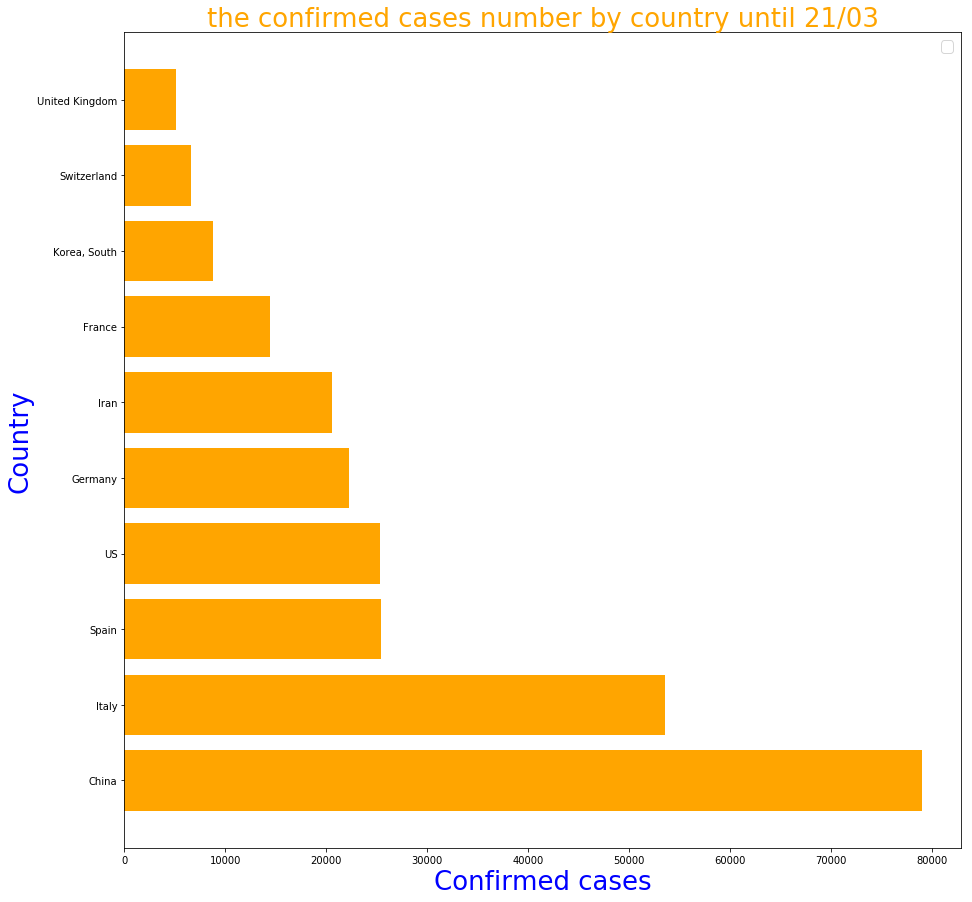

In [9]:
#hereunder , we will draw a bar plot recapitilaze the ten most affected country by the corona virus until 21/03.
import matplotlib.pyplot as plt 
plt.subplots(figsize=(15,15))
x=tf['ConfirmedCases'].sort_values(ascending=False)[:10]
y=tf.loc[x.index]['Country/Region']
plt.barh(y,x,color='orange')
plt.xlabel('Confirmed cases',fontsize=26,color='blue')
plt.ylabel('Country',fontsize=26,color='blue')
plt.title("the confirmed cases number by country until 21/03",fontsize=26,color='orange')
plt.legend(fontsize=16)
plt.show()

##### <font color=redblue> We will focus in the next of this part to analyse the spread of the this virus in theses countries : China ,Italy ,USA and France .

#### 1.2.1 China :

In [10]:
tc=tff[tff["Country/Region"]=="China"]
fig=px.line(tc,x="Date",y="ConfirmedCases")
fig.update_layout(title={'text':"<br> Evolution of confirmed cases in china over <br> course the period between \
22/01 and 21/03",'x':0.5,'y':1,'xanchor':'center','yanchor':'top'})
fig.show()

##### <font color=redblue> The above curve shows that china start to control the spread of the virus from the 01/03 . Starting from this date , the number of confirmed had stopped to be increased which confirm that china autority had taken the control of the spread of the corona virus.

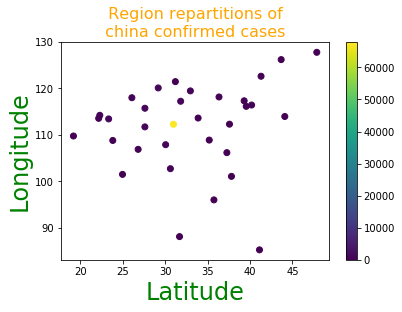

In [11]:
cr=datas.groupby(['Country/Region','Lat','Long','Date']).sum().reset_index()
ch=cr[cr['Country/Region'].str.lower()=='china']
chr=ch[ch['Date']=='2020-03-21']
plt.scatter(chr['Lat'],chr['Long'],c=chr['ConfirmedCases'])
plt.xlabel('Latitude',fontsize=24,color='green')
plt.ylabel('Longitude',fontsize=24,color='green')
plt.title(' Region repartitions of \n china confirmed cases ',fontsize=16,color='orange')
plt.colorbar()
plt.show()

#### 1.2.2 Italy :

In [12]:
ti=tff[tff["Country/Region"]=="Italy"]
fig=px.line(ti,x='Date',y='ConfirmedCases')
fig.update_layout(title={'text': "<br> Evolution of italy confirmed cases over course <br> the period between 22/01\
and 21/03",'x':0.5,'y':1,'xanchor':'center','yanchor':'top'})
fig.show()

##### <font color=redblue> The evolution of the confirmed cases curve , shows that these number had accelerated from 23/02 in short time to reach more than 10k cases on 10 march which means in less than 18 days . This confirm that italy autority  had not  token  the threaten at  seriously and had not token a necessary precautions to avoid such spread of virus in such time .

#### 1.2.3 USA :

In [13]:
tu=tff[tff['Country/Region'].str.lower()=="us"]
fig=px.line(tu,x='Date',y='ConfirmedCases')
fig.update_layout(title={'text':"<br> USA Evolution of confirmed cases over course <br> the period between 22/01 and 21/03",\
                        'x':0.5,'y':1,'xanchor':'center','yanchor':'top'})
fig.show()

##### <font color=redblue> We notice from the curve above , that USA situation start to be worrying from the date of 10 march , when the affected person number had rapidly increased . In the next curve , we will study  the distribution of theses number around USA states which allow us to figure out the situation stage of corona virus in USA.

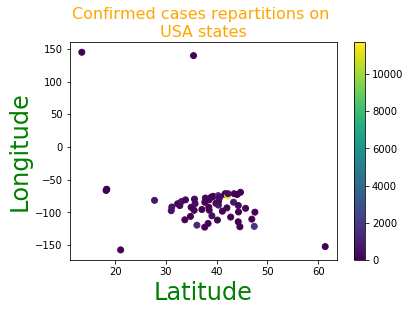

In [14]:
ur=cr[cr['Country/Region'].str.lower()=='us']
us=ur[ur['Date']=="2020-03-21"]
plt.scatter(us['Lat'],us['Long'],c=us['ConfirmedCases'])
plt.xlabel('Latitude',fontsize=24,color='green')
plt.ylabel('Longitude',fontsize=24,color='green')
plt.title('Confirmed cases repartitions on \n USA states ',color='orange',fontsize=16)
plt.colorbar()


##### <font color=redblue> We can notice from the chart above that the most cases enregistred in USA , are mostly focused in some neighbors states , which means that theses cases come from contamination between local citizen . Thus, the USA autority had not token necessary measures to limit the spread of this virus on theses states . Henceforth , USA should take a specific measures to avoid the spread of the virus on other states.

## 2.Fatalities analysis :

In [15]:
fig=px.line(df,x="Date",y="Fatalities")
fig.update_layout(title={'text':"<br> Evolution of fatalities in the world <br> over the course the period \
between 22/01 and 21/03","x":0.5,"y":0.9,"xanchor":"center","yanchor":"top"})
fig.show()

In [16]:
fig=px.scatter_geo(tf,locations="Country/Region",hover_name="Country/Region",color="Fatalities",\
                  locationmode="country names",projection="natural earth")
fig.update_layout(title={'text':"<br> The total number of death by country <br> over course the period between\
22/01 and 21/03","x":0.5,"y":1,"xanchor":"center","yanchor":"top"})
fig.show()

##### <font color=redblue> We notice from the chart above for example that italy hase the highest number of death ,wheras it not has the highest number of confirmed cases . This will lead us to analyse the rate of death by country .

In [17]:
mf=dff[(dff['Country/Region'].str.lower()=='china') | (dff['Country/Region'].str.lower()=='us')\
| (dff['Country/Region'].str.lower()=='italy') | (dff['Country/Region'].str.lower()=='spain')\
| (dff['Country/Region'].str.lower()=='germany') | (dff['Country/Region'].str.lower()=='france')\
| (dff['Country/Region'].str.lower()=='korea,south') | (dff['Country/Region'].str.lower()=='iran')]

mf['death rate']=[(mf.loc[i]['Fatalities']/mf.loc[i]['ConfirmedCases']) if mf.loc[i]['ConfirmedCases'] > 0 \
                  else 0 for i in mf.index]
fig=px.scatter(mf,x="Country/Region",y="Country/Region",color='Country/Region',size='death rate',\
               animation_frame="Date",hover_name='Country/Region')
fig.update_layout(title={'text':"The evolution of death rate in each country by the time",'x':0.5,'y':0.9,\
                        'xanchor':'center','yanchor':'top'})
fig.show()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



##### <font color=redblue> We can notice from the chart above that the death rate increase by the time in each country .

# Data preparation :

In [18]:
# we create a function which can allow to transform the variable date to a feature enginering which give the 
# number of elapsed days from the date to the first day of our study which is 2020-01-22.
from datetime import datetime
date0="2020-01-22"
date0=datetime.strptime(date0, "%Y-%m-%d")
def encoded_date(df):
    df['Date']=pd.to_datetime(df['Date'])
    df['Date']=[(c-date0).days for c in df['Date']]


In [19]:
encoded_date(datas)
encoded_date(test)

In [20]:
def firstday_confirmedcases(datas,i):
    bf=datas[(datas['Country/Region']==datas.loc[i]['Country/Region']) & (datas['Lat']==datas.loc[i]['Lat'])\
                         & (datas['Long']==datas.loc[i]['Long'])]
    ex=(bf[bf['ConfirmedCases']>0]).index
    if len(ex)> 0 :
       d=(datas.loc[ex[0]])['Date']
    else :
       d=61
    return d

In [21]:
datas['first_day']=[firstday_confirmedcases(datas,i) for i in datas.index]
datas['eldays']=[max(0,datas.loc[i]['Date']- datas.loc[i]['first_day']) for i in datas.index]

In [22]:
def rec_firstday(i):
    reg=test.loc[i]['Country/Region']
    lat=test.loc[i]['Lat']
    long=test.loc[i]['Long']
    d=datas[(datas['Country/Region']==reg) & (datas['Lat']==lat) & (datas['Long']==long)]['first_day']
    d=d.to_numpy()
    d=d[0]
    return d

In [23]:
test['first_day']=[rec_firstday(i) for i in test.index]

In [24]:
test['eldays']=[max(0,test.loc[i]['Date']- test.loc[i]['first_day']) for i in test.index]

In [25]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
lb_transformer=lb.fit(datas['Country/Region'])
datas['Country/Region']=lb_transformer.transform(datas['Country/Region'])
test['Country/Region']=lb_transformer.transform(test['Country/Region'])

In [26]:
# delete useless column 
del(datas['Province/State'])
del(datas['Id'])
del(test['Province/State'])

In [27]:
# Splitting datas.
splitting_date="2020-03-18"
splitting=(datetime.strptime(splitting_date,"%Y-%m-%d") -date0).days
Train=datas[datas['Date']<splitting]
validation=datas[datas['Date'] >= splitting]

In [28]:
Xtr=Train[['Country/Region','Lat','Long','eldays','Date']].to_numpy()
Ytr=Train['ConfirmedCases'].to_numpy()
Ztr=Train['Fatalities'].to_numpy()
Xts=validation[['Country/Region','Lat','Long','eldays','Date']].to_numpy()
Yts=validation['ConfirmedCases'].to_numpy()
Zts=validation['Fatalities'].to_numpy()

# NN model :

In [29]:
from keras.layers import Dense,Input,BatchNormalization,Dropout
from keras.models import Model 
from keras.optimizers import Adam
Inputs=Input(shape=(5,))
model=Dense(128,input_shape=(5,),activation='relu')(Inputs)
model=BatchNormalization(momentum=0.15)(model)
model=Dropout(0.2)(model)
model=Dense(256,activation='relu')(model)
model=BatchNormalization(momentum=0.15)(model)
model=Dropout(0.3)(model)
model=Dense(256,activation='relu')(model)
model=BatchNormalization(momentum=0.15)(model)
model=Dropout(0.25)(model)
model=Dense(256,activation='relu')(model)
model=BatchNormalization(momentum=0.15)(model)
ccases=Dense(1,activation='linear')(model)
deaths=Dense(1,activation='linear')(model)
model=Model(inputs=Inputs,outputs=[ccases,deaths])

Using TensorFlow backend.


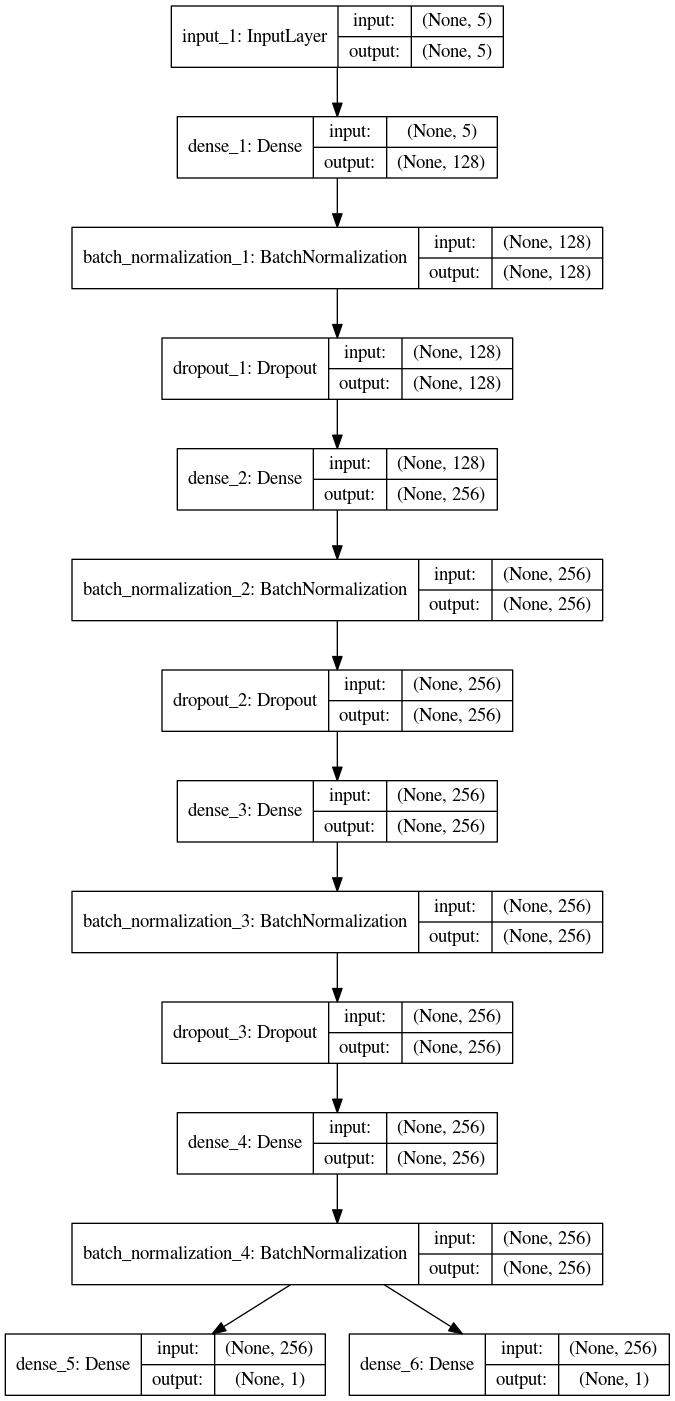

In [30]:
from keras.utils import plot_model
plot_model(model,to_file='model.png',show_shapes=True)

In [31]:
from keras.losses import mean_squared_logarithmic_error
model.compile(loss="mean_squared_logarithmic_error",optimizer='Adam',metrics=['mean_squared_logarithmic_error'])

In [32]:
from keras.callbacks import ReduceLROnPlateau
lr=ReduceLROnPlateau(monitor='dense_5_loss',patience=3,factor=0.2,min_lr=0.001)
lm=ReduceLROnPlateau(monitor='dense_6_loss',patience=3,factor=0.2,min_lr=0.001)

In [33]:
batch_size=32
md=model.fit(Xtr,{'dense_5':Ytr,'dense_6':Ztr},batch_size=batch_size,epochs=200,validation_data=(Xts,\
                                                                            [Yts,Zts]),callbacks=[lr,lm])

Train on 15904 samples, validate on 1988 samples
Epoch 1/200
15904/15904 [==============================] - 4s 260us/step - loss: 1.8161 - dense_5_loss: 1.4553 - dense_6_loss: 0.3608 - dense_5_mean_squared_logarithmic_error: 1.4553 - dense_6_mean_squared_logarithmic_error: 0.3608 - val_loss: 4.7036 - val_dense_5_loss: 2.9099 - val_dense_6_loss: 1.7334 - val_dense_5_mean_squared_logarithmic_error: 2.9458 - val_dense_6_mean_squared_logarithmic_error: 1.7578
Epoch 2/200
15904/15904 [==============================] - 3s 172us/step - loss: 1.4317 - dense_5_loss: 1.0983 - dense_6_loss: 0.3334 - dense_5_mean_squared_logarithmic_error: 1.0983 - dense_6_mean_squared_logarithmic_error: 0.3334 - val_loss: 4.5449 - val_dense_5_loss: 2.9626 - val_dense_6_loss: 1.5367 - val_dense_5_mean_squared_logarithmic_error: 2.9866 - val_dense_6_mean_squared_logarithmic_error: 1.5583
Epoch 3/200
15904/15904 [==============================] - 3s 177us/step - loss: 1.3505 - dense_5_loss: 1.0200 - dense_6_loss: 0.

# Prediction :

In [34]:
pred=test[['Country/Region','Lat','Long','eldays','Date']].to_numpy()
prediction=model.predict(pred)

In [35]:
submission['ConfirmedCases']=prediction[0]
submission['Fatalities']=prediction[1]

In [36]:
submission.to_csv('submission.csv',index=False)